In [1]:
import choix
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# Read pairwise comparison data
# The data is represented in a comparison matrix
# Each value shows the number of voters who chose the row title over the column title
# The data files are manually created from IG stories of Trial and Error
data = pd.read_csv('data/best_vid_apr.csv', index_col=0)
data = data.fillna(0)

In [3]:
# Inspect the data
# For example, 28032 people prefer IG朋友(下集) over 冰島灘鼓龍
# In this example, since the votes in the final round were not announced yet, approximates based on the ratio shown in the IG story were used.
data

,冰島灘鼓龍,IG朋友(上集),IG朋友(下集),殺手豪大戰面盲保安,無糧藥廠,Channel需要s,"表妹, 你好嘢!",跌嘢唔好搵,點解你會喺到?
冰島灘鼓龍,0.0,0.0,8574.0,0.0,0.0,0.0,0.0,0.0,0.0
IG朋友(上集),0.0,0.0,15248.0,0.0,0.0,0.0,0.0,0.0,0.0
IG朋友(下集),28032.0,21495.0,0.0,29085.0,0.0,4000.0,0.0,0.0,0.0
殺手豪大戰面盲保安,0.0,0.0,5927.0,0.0,20557.0,0.0,0.0,0.0,0.0
無糧藥廠,0.0,0.0,0.0,11873.0,0.0,0.0,0.0,0.0,0.0
Channel需要s,0.0,0.0,6000.0,0.0,0.0,0.0,32056.0,24781.0,0.0
"表妹, 你好嘢!",0.0,0.0,0.0,0.0,0.0,3626.0,0.0,0.0,0.0
跌嘢唔好搵,0.0,0.0,0.0,0.0,0.0,13075.0,0.0,0.0,26107.0
點解你會喺到?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8867.0,0.0


In [4]:
# Fit Bradley–Terry model
params = choix.lsr_pairwise_dense(data.to_numpy())

In [5]:
# Since the model calculates probabilities using softmax, apply a logistic transform here to get intuitive scores
scores = 100 / (1 + np.exp(-params))

In [6]:
# Combine the scores with the video titles
results = pd.DataFrame({'title': data.index.values, 'score': scores})

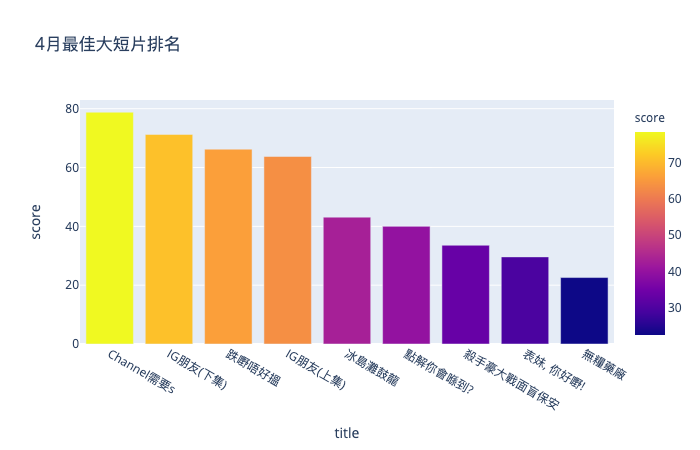

In [7]:
# Plot the full ranking as a bar chart
fig = px.bar(results.sort_values(by=['score'], ascending=False),    # sort the videos in descending order of their scores
             x='title', y='score', color='score', title='4月最佳大短片排名')
fig.show('png')

In [8]:
# Finally, make this a function to estimate the ranking for other months
def estimate_full_ranking(filename: str, chart_title: str):
    data = pd.read_csv(filename, index_col=0)
    data = data.fillna(0)
    params = choix.lsr_pairwise_dense(data.to_numpy())
    scores = 100 / (1 + np.exp(-params))
    results = pd.DataFrame({'title': data.index.values, 'score': scores})
    fig = px.bar(results.sort_values(by=['score'], ascending=False),
             x='title', y='score', color='score', title=chart_title)
    fig.show('png')

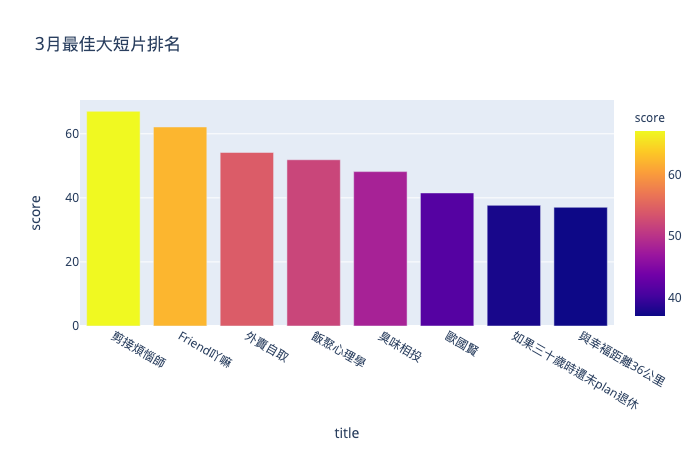

In [9]:
# Since Plotly express does not support subplots (and I am lazy), I will just plot these one by one instead of in a loop

estimate_full_ranking('data/best_vid_mar.csv', '3月最佳大短片排名')

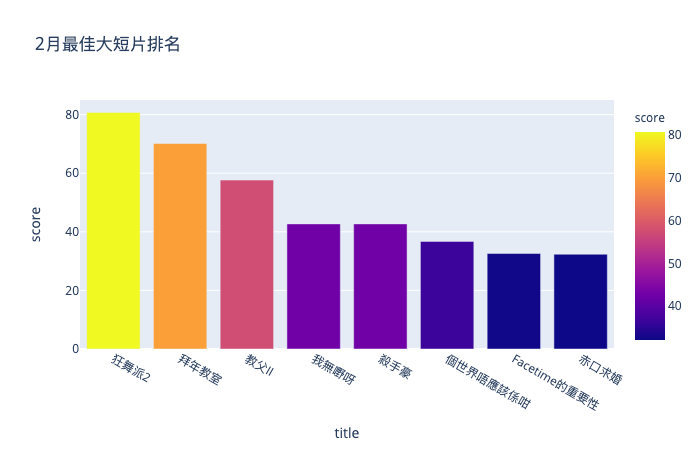

In [10]:
estimate_full_ranking('data/best_vid_feb.csv', '2月最佳大短片排名')

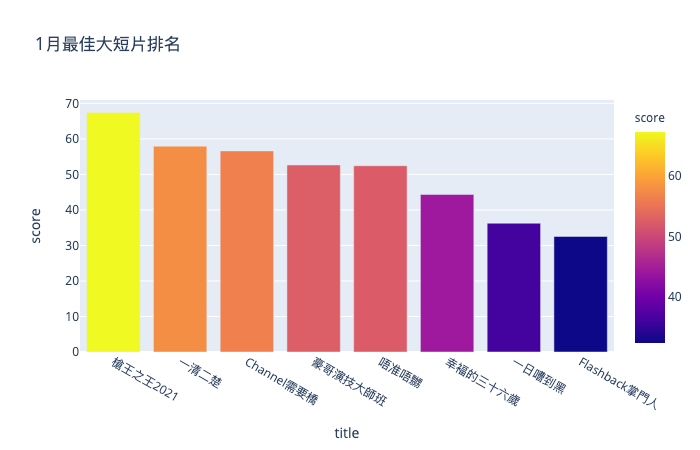

In [11]:
estimate_full_ranking('data/best_vid_jan.csv', '1月最佳大短片排名')